In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [4]:
def compute_loss(y, tx, w, name="MSE"):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    N = tx.shape[0]
    if name == "MSE":
        return np.sum((y - tx @ w)**2)/2*N
    elif name == "MAE":
        return np.sum(np.absolute((y - tx @ w)))/2*N
    else:
        raise NotImplementedError 

# 2. Grid Search

Fill in the function `grid_search()` below:

In [5]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    for i in range(grid_w0.shape[0]):
        for j in range(grid_w1.shape[0]):
            w = np.array([grid_w0[i], grid_w1[j]])
            l = compute_loss(y, tx, w)
            losses[i][j] = l

    return losses

Let us play with the grid search demo now!

Grid Search: loss*=1879354101.9523237, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.090 seconds


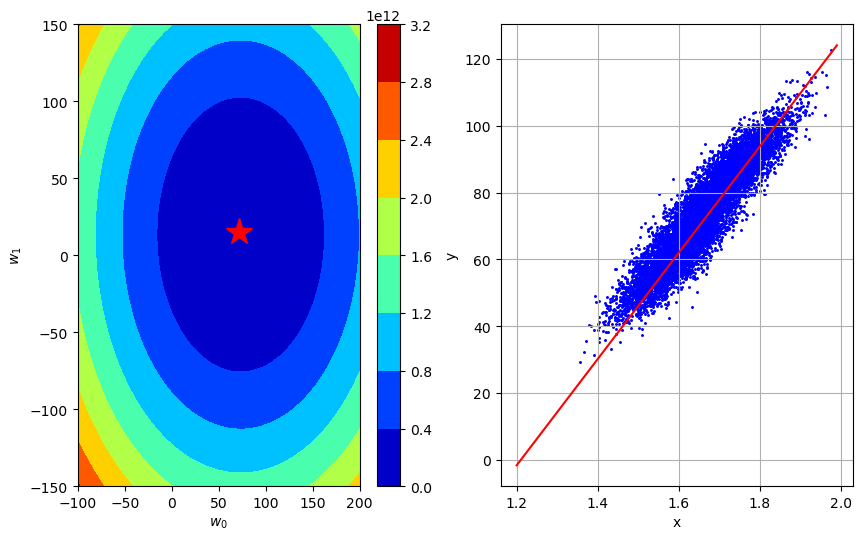

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    N = tx.shape[0]
    e = (y - tx @ w)
    return -(tx.T @ e)/N

In [8]:
compute_gradient(y, tx, w=np.array([100, 20]))

array([26.706078  ,  6.52028757])

Please fill in the functions `gradient_descent` below:

In [9]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):

        # Compute the gradient and loss
        g = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)

        # Update w
        w = w - gamma * g

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [10]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.2

# Initialization
w_initial = np.array([100, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=37804738819.875885, w0=94.65878440042104, w1=10.695942486997817
GD iter. 1/49: loss=24748924807.998432, w0=90.38581192075787, w1=11.252696476596071
GD iter. 2/49: loss=16393203840.396858, w0=86.96743393702734, w1=11.69809966827467
GD iter. 3/49: loss=11045542421.131847, w0=84.23273155004291, w1=12.054422221617548
GD iter. 4/49: loss=7623039112.802246, w0=82.04496964045536, w1=12.339480264291852
GD iter. 5/49: loss=5432636995.471291, w0=80.29476011278533, w1=12.567526698431294
GD iter. 6/49: loss=4030779640.3794827, w0=78.8945924906493, w1=12.749963845742846
GD iter. 7/49: loss=3133590933.1207285, w0=77.77445839294047, w1=12.895913563592089
GD iter. 8/49: loss=2559390160.4751225, w0=76.87835111477342, w1=13.012673337871481
GD iter. 9/49: loss=2191901665.981939, w0=76.16146529223978, w1=13.106081157294996
GD iter. 10/49: loss=1956709029.5063012, w0=75.58795663421286, w1=13.180807412833808
GD iter. 11/49: loss=1806185742.1618896, w0=75.12914970779133, w1=13.24058841726

In [12]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [13]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    return compute_gradient(y, tx, w)

def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
                # Compute the gradient and loss
                g = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
        
                # Update w
                w = w - gamma * g   

        loss = compute_loss(y, tx, w)
        ws.append(w)
        losses.append(loss)
        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                    bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [14]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.2
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=197165751879.3091, w0=13.426628389266185, w1=-4.643488643260147
SGD iter. 1/49: loss=130321459966.93481, w0=26.540107144813774, w1=-6.262076235016409
SGD iter. 2/49: loss=98091030209.00433, w0=35.92794129280369, w1=-9.646729445995101
SGD iter. 3/49: loss=30780273854.900204, w0=49.90519563030117, w1=7.3314460073506975
SGD iter. 4/49: loss=16203427636.958073, w0=56.39277568996655, w1=16.245219682707802
SGD iter. 5/49: loss=9759112091.042387, w0=60.74895668151856, w1=10.827484845119027
SGD iter. 6/49: loss=8036810333.726059, w0=63.32948216648971, w1=7.94126773460051
SGD iter. 7/49: loss=7172717098.930816, w0=64.79274023961558, w1=7.122631746333939
SGD iter. 8/49: loss=5367025852.012469, w0=66.46071219941305, w1=8.013819544071524
SGD iter. 9/49: loss=5402862950.982948, w0=66.28695003510674, w1=8.170491481242806
SGD iter. 10/49: loss=3252328103.1819825, w0=68.4749035136233, w1=10.15528058373226
SGD iter. 11/49: loss=3510461905.1086106, w0=67.38292416038828, w1=11.358965

In [15]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [16]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [17]:
y.shape, tx.shape

((202,), (202, 2))

In [18]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=197800723.8251788, w0=64.94786659436048, w1=108.40084710012992
SGD iter. 1/49: loss=131763322.75174554, w0=16.155115822931506, w1=65.5565612983914
SGD iter. 2/49: loss=130956579.35462542, w0=18.403364248161694, w1=67.50098512962474
SGD iter. 3/49: loss=214207701.97277272, w0=-22.258943334403405, w1=-21.95971272726699
SGD iter. 4/49: loss=169076750.6354875, w0=28.756558599919614, w1=-67.08227960106905
SGD iter. 5/49: loss=70690635.08722994, w0=83.6570244938411, w1=-45.895527062833565
SGD iter. 6/49: loss=36510077.132255204, w0=38.86916937727876, w1=-9.42796780578275
SGD iter. 7/49: loss=2806956.610058678, w0=72.87525705345186, w1=8.961542282429512
SGD iter. 8/49: loss=3179797.2643480795, w0=76.67454227080997, w1=6.8875342763288
SGD iter. 9/49: loss=4408702.182423348, w0=66.35700675020351, w1=6.0575679143550945
SGD iter. 10/49: loss=2747376.7359653907, w0=73.14729170134866, w1=12.432507656723374
SGD iter. 11/49: loss=3230787.8268707236, w0=78.67451618240742, w1=13.33

In [19]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [32]:
import random
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """

    # Start with computing the subgradient for each datapoint
    e = y - tx @ w # (N,)
    n = e.shape[0]
    abs_subgrad = np.zeros((n, 2))
    
    for i in range(n):
        if e[i] > 0:
            abs_subgrad[i] = -tx[i] # -X
        elif e[i] < 0:
            abs_subgrad[i] = tx[i] # X
        else:
            print(">>>>>>>> Using subgradient!")
            # For each weight, sample from the range of [-Xi, Xi]
            m = tx[i].shape[0]
            subgradients = []
            for j in range(m):
                x = tx[i, j]
                g = random.uniform(-x, x)
                subgradients.append(g)
            abs_subgrad[i] = np.array(subgradients)

    # Now, we take the average
    return np.mean(abs_subgrad, axis=0)

In [33]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters): 
        # Compute the gradient and loss
        g = compute_subgradient_mae(y, tx, w)
        loss = compute_loss(y, tx, w, "MAE")

        # Update w
        w = w - gamma * g

        # Store weights and loss
        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [38]:
# Define the parameters of the algorithm.
max_iters = 200
gamma = 0.9
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/199: loss=1511131.3750522078, w0=0.9, w1=7.855102706902345e-16
SubGD iter. 1/199: loss=1492769.5750522078, w0=1.8, w1=1.571020541380469e-15
SubGD iter. 2/199: loss=1474407.775052208, w0=2.7, w1=2.3565308120707034e-15
SubGD iter. 3/199: loss=1456045.975052208, w0=3.6, w1=3.142041082760938e-15
SubGD iter. 4/199: loss=1437684.175052208, w0=4.5, w1=3.927551353451173e-15
SubGD iter. 5/199: loss=1419322.375052208, w0=5.4, w1=4.7130616241414076e-15
SubGD iter. 6/199: loss=1400960.575052208, w0=6.300000000000001, w1=5.498571894831642e-15
SubGD iter. 7/199: loss=1382598.7750522078, w0=7.200000000000001, w1=6.284082165521877e-15
SubGD iter. 8/199: loss=1364236.975052208, w0=8.100000000000001, w1=7.069592436212112e-15
SubGD iter. 9/199: loss=1345875.175052208, w0=9.000000000000002, w1=7.855102706902346e-15
SubGD iter. 10/199: loss=1327513.3750522078, w0=9.900000000000002, w1=8.64061297759258e-15
SubGD iter. 11/199: loss=1309151.575052208, w0=10.800000000000002, w1=9.426123248282814e

In [39]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=201, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [43]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
                # Compute the gradient and loss
                g = compute_subgradient_mae(minibatch_y, minibatch_tx, w)
        
                # Update w
                w = w - gamma * g
        
        loss = compute_loss(y, tx, w, "MAE")
        ws.append(w)
        losses.append(loss)
        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [44]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=1496849.975052208, w0=0.7, w1=0.7951697251173472
SubSGD iter. 1/499: loss=1482568.575052208, w0=1.4, w1=1.7420819868597777
SubSGD iter. 2/499: loss=1468287.175052208, w0=2.0999999999999996, w1=0.5580797864658862
SubSGD iter. 3/499: loss=1454005.7750522078, w0=2.8, w1=0.18781169593708957
SubSGD iter. 4/499: loss=1439724.3750522078, w0=3.5, w1=-0.2439808823463308
SubSGD iter. 5/499: loss=1425442.975052208, w0=4.2, w1=0.8139344244812274
SubSGD iter. 6/499: loss=1411161.5750522078, w0=4.9, w1=1.012695290299752
SubSGD iter. 7/499: loss=1396880.175052208, w0=5.6000000000000005, w1=0.7572634091981811
SubSGD iter. 8/499: loss=1382598.7750522078, w0=6.300000000000001, w1=1.4001931079619767
SubSGD iter. 9/499: loss=1368317.3750522078, w0=7.000000000000001, w1=2.256415160466515
SubSGD iter. 10/499: loss=1354035.975052208, w0=7.700000000000001, w1=2.072254382148195
SubSGD iter. 11/499: loss=1339754.5750522078, w0=8.4, w1=3.030389473050002
SubSGD iter. 12/499: loss=1325473.

In [45]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

---